In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import networkx as nx
from SpreadPy import AnalyticalUtils

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
g = nx.Graph()

g.add_edge(0, 1, layer=['l2'])
g.add_edge(0, 2, layer=['l1'])
g.add_edge(0, 3, layer=['l1'])
g.add_edge(0, 4, layer=['l2'])

g.add_edge(1, 4, layer=['l2'])
g.add_edge(1, 2, layer=['l1','l2'])
g.add_edge(1, 5, layer=['l1','l2'])

g.add_edge(2, 3, layer=['l1'])
g.add_edge(2, 4, layer=['l1'])
g.add_edge(2, 5, layer=['l1','l2'])

g.add_edge(3, 4, layer=['l1'])
g.add_edge(3, 5, layer=['l1','l2'])

In [4]:
utils = AnalyticalUtils(g)

In [5]:
g_l1 = utils.graph_for_layers(layer_names=['l1'])
g_l2 = utils.graph_for_layers(layer_names=['l2'])

In [6]:
L_l1 = utils.laplacian_for_layers(layer_names=['l1'])
L_l2 = utils.laplacian_for_layers(layer_names=['l2'])

L_l1_l2 = utils.average_laplacian(L_l1, L_l2)

In [7]:
L_l1

array([[ 2,  0, -1, -1,  0,  0],
       [ 0,  2, -1,  0,  0, -1],
       [-1, -1,  5, -1, -1, -1],
       [-1,  0, -1,  4, -1, -1],
       [ 0,  0, -1, -1,  2,  0],
       [ 0, -1, -1, -1,  0,  3]], dtype=int32)

In [8]:
L_l2

array([[ 2, -1,  0,  0, -1,  0],
       [-1,  4, -1,  0, -1, -1],
       [ 0, -1,  2,  0,  0, -1],
       [ 0,  0,  0,  1,  0, -1],
       [-1, -1,  0,  0,  2,  0],
       [ 0, -1, -1, -1,  0,  3]], dtype=int32)

In [9]:
L_l1_l2

array([[ 2. , -0.5, -0.5, -0.5, -0.5,  0. ],
       [-0.5,  3. , -1. ,  0. , -0.5, -1. ],
       [-0.5, -1. ,  3.5, -0.5, -0.5, -1. ],
       [-0.5,  0. , -0.5,  2.5, -0.5, -1. ],
       [-0.5, -0.5, -0.5, -0.5,  2. ,  0. ],
       [ 0. , -1. , -1. , -1. ,  0. ,  3. ]])

In [10]:
lambda2_l1 = utils.compute_second_smallest_eigenvalue(L_l1)
lambda2_l1

1.5188056

In [11]:
lambda2_l2 = utils.compute_second_smallest_eigenvalue(L_l2)
lambda2_l2

0.63135076

In [12]:
lambda2_l1_l2 = utils.compute_second_smallest_eigenvalue(L_l1_l2)
lambda2_l1_l2

2.0000007

In [13]:
Dx = [.1, .2, .5, 1, 2, 3, 4, 5, 10]

In [14]:
SL = []
lambda2_sl = []
for d in Dx:
    sl = utils.supralaplacian(L_l1, L_l2, dx=d)
    SL.append(sl)
    
    lambda2_sl.append(utils.compute_second_smallest_eigenvalue(sl))

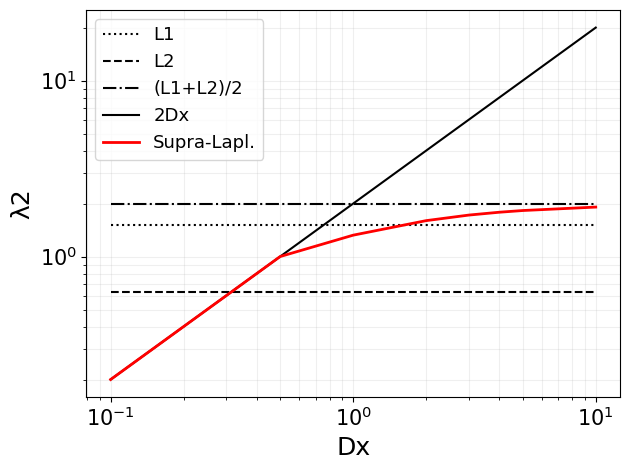

In [15]:
plt.plot(Dx, [lambda2_l1]*len(Dx), label='L1', ls='dotted', color='k') # constant
plt.plot(Dx, [lambda2_l2]*len(Dx), label='L2', ls='dashed', color='k') # constant
plt.plot(Dx, [lambda2_l1_l2]*len(Dx), label='(L1+L2)/2', ls='dashdot', color='k') # constant
plt.plot(Dx, [2*el for el in Dx], label='2Dx', color='k')
plt.plot(Dx, lambda2_sl, label='Supra-Lapl.', color='red', lw=2)
plt.loglog()
plt.legend(fontsize=13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Dx', fontsize=18)
plt.ylabel('λ2', fontsize=18)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()